# Regresión como modelo

Ahora que ya hemos visto dos ejemplos de modelización, vamos a ver cómo algunas librerías de Python, como sklearn, implementan modelos. 

Nos servirá para: 

* Reconocer conceptos que hemos aprendido en un caso de "caja negra" (sí, los data scientists usamos muchos modelos en modo caja negra). 

* Ver otro caso de uso (detectar puntos que se desvían del comportamiento esperado). 

* Introducir el problema del overfitting.

Vamos a usar un dataset con 2 series de datos extraídas de consultas a Google Trends. 

  <script type="text/javascript" src="https://ssl.gstatic.com/trends_nrtr/1243_RC12/embed_loader.js"></script>
  

In [1]:
import pandas as pd

frm = pd.read_csv("../multiTimeline.csv", header=1)
frm.columns = ['date', 'FCB', 'RMA']
frm.head()

FileNotFoundError: File b'../multiTimeline.csv' does not exist

Pintar las series por separado, y luego una en función de la otra. 

In [1]:
# Rellenar por estudiante

In [2]:
# Rellenar por estudiante

Podríamos esperar que como las dos series se refieren a equipos de fútbol de la misma liga, el interés que suscitan ambos sea similar. Vemos en la gráfica que hay una tendencia a que cuando uno es mayor, el otro también. 

Vamos a ajustar un modelo de regresión. Los modelos de regresión sirven para modelizar cuánto varía una variable Y cuando aumenta otra variable X. 

Una regresión lineal intenta cuantificarlo de esta forma: Y = m*X + b

No vamos a profundizar mucho en regresión, porque hay una clase dedicada a ello. Y porque la idea es usar una función de caja negra que hace regresión.

In [4]:
# Ejemplo de codigo en sklearn regresion fit y predict

from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Rellenar
#
#

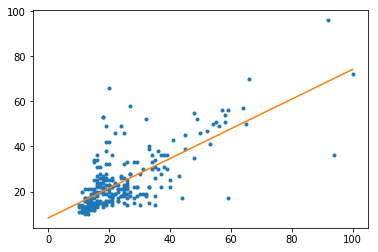

In [6]:
# Pintar la línea

Vamos a detectar "outliers": puntos que salen del valor esperado. Puntos en los que Y es mucho más alto o bajo de lo que el modelo esperaría. Corresponden a puntos donde uno de los 2 ha suscitado más interés por alguna razón. 

Podríamos plantear que el interés en RMA está dentro de lo esperado, si en un punto X, la Y está dentro de un radio de k veces la desviación estándar (como vimos en el ejemplo 1). 

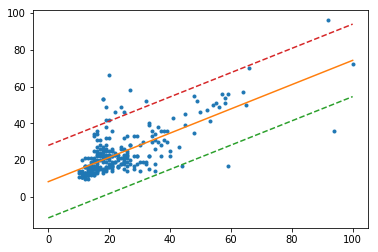

In [8]:
# Rellenar por el estudiante. Producir la siguiente curva

En la clase, listaremos como ejemplo que los modelos la librería sklearn tienen fit y predict. Mismo para otros frameworks (keras, tf), matlab / R, ...

Hasta ahora no hemos comentado muchas desventajas de estas metodologías de modelización. Pero las tienen. Los siguientes problemas se debatirán en clase: 

* Overfitting (en interpolación se conoce como Fenomeno de Runge). Lo veremos en el ejemplo siguiente. 

* Domain adaptation

* Sesgo (y discriminacion)

* Adversariedad

## Tu primer ejemplo de overfitting

Podemos complicar el modelo de regresión. 

Vamos a ver el fenómeno de overfitting, que sucede cuando se usan modelos demasiado complicados. Vamos a verlo con un ejemplo, y en clase se introducirá la idea de underfitting / overfitting y capacidad del modelo. Aquí no vamos a ver teoría matemática sonre ello (que la hay), pero es un concepto que conviene conocer pronto porque aparece durante toda la vida del data scientist. 

(En otra clase más adelante se ve este tema, y métodos para evitarlo, como  la regularización). 

El ejemplo ajusta una regresión polinómica (es más complicada que la lineal), y vemos cómo a partir de cierto grado del polinomio sucede este efecto. 

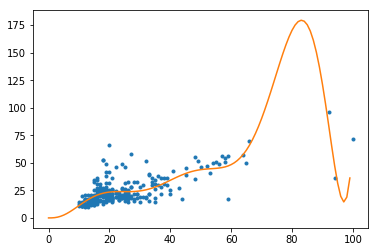

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=9)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
model = model.fit(x, y)
c = model.named_steps['linear'].coef_[0][::-1]

xi = np.arange(100)
yi = np.array([np.polyval(c, s) for s in xi])
plt.plot(x, y, '.')
plt.plot(xi, yi)

# Take-home messages

* Existen muchos modelos ya disponibles en librerías populares y vas a utilizarlos. 

* La regresión es un tipo de modelo (específicamente un modelo estadístico),se usa para modelar el comportamiento esperado de una variable Y en función del valor de X. 

* En la librería sklearn de python está implementada y se usa en pocas líneas llamando a las funciones fit y predict de la clase LinearRegression. 

* Se puede usar la regresión para detectar outliers

* Un modelo demasiado complejo puede dar lugar al fenómeno del overfitting. 
